<a href="https://colab.research.google.com/github/ktemadarko/3rd-repo/blob/master/Starter_notebook__1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyLadies: Financial Inclusion in Africa

The main dataset contains demographic information and what financial services are used by approximately 33,610 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

The data have been split between training and test sets. The test set contains all information about each individual except for whether the respondent has a bank account or not.

Your goal is to accurately predict the likelihood that an individual has a bank account or not, i.e. Yes = 1, No = 0.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SubmissionFile.csv to SubmissionFile.csv
Saving Test_v2.csv to Test_v2.csv
Saving Train_v2.csv to Train_v2.csv
Saving VariableDefinitions.csv to VariableDefinitions.csv
User uploaded file "SubmissionFile.csv" with length 247654 bytes
User uploaded file "Test_v2.csv" with length 1201313 bytes
User uploaded file "Train_v2.csv" with length 2864060 bytes
User uploaded file "VariableDefinitions.csv" with length 1156 bytes


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# load the data
train = pd.read_csv('Train_v2.csv')
test = pd.read_csv('Test_v2.csv')
submission = pd.read_csv('SubmissionFile.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [5]:
# view first 5 rows of training set
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# view first 5 rows of test set
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [7]:
# see how the submission file should look like
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [8]:
# see the variable definitions
variables.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [9]:
# check the shapes of the train and test sets
print ('the train set has '+str(train.shape[0]) +' rows and '+ str(train.shape[1]) + ' columns')
print ('the test set has '+str(test.shape[0]) +'rows and '+ str(test.shape[1]) + ' columns')

the train set has 23524 rows and 13 columns
the test set has 10086rows and12 columns


In [10]:
# check the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


## Univariate Analysis

In [ ]:
# check how many levels are involved in each of the categorical features (object)

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


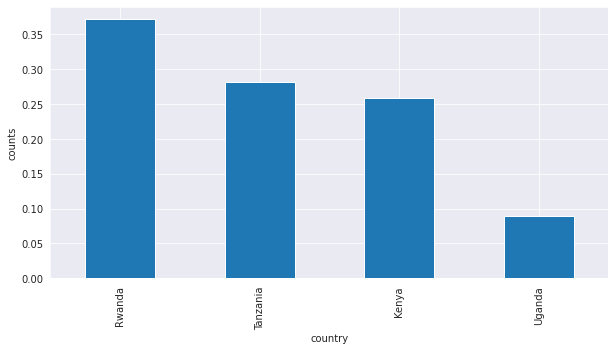

In [ ]:
print(train['country'].value_counts())
plt.figure(figsize=(10,5))
train['country'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('country')
print('+-+-'*28)

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


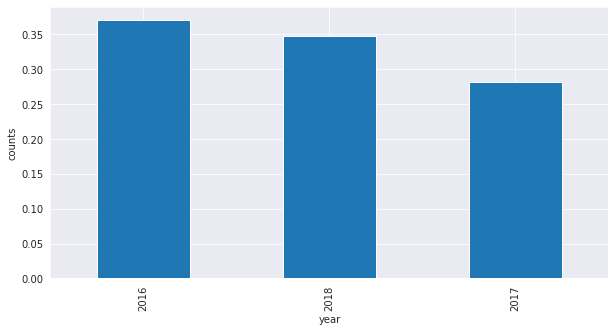

In [ ]:
print(train['year'].value_counts())
plt.figure(figsize=(10,5))
train['year'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('year')
print('+-+-'*28)

No     20212
Yes     3312
Name: bank_account, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


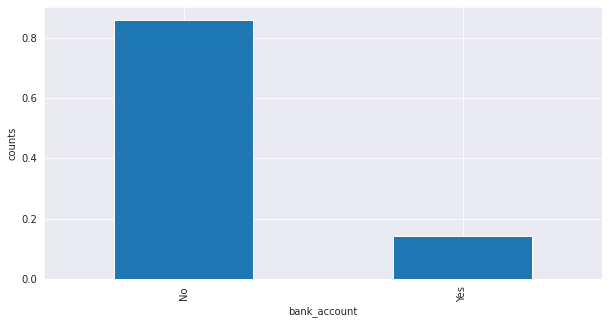

In [ ]:
print(train['bank_account'].value_counts())
plt.figure(figsize=(10,5))
train['bank_account'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('bank_account')
print('+-+-'*28)

It can be seen from the above that predictor variable (bank_account) is higly imbalanced.

We should find a way of balancing it.

Rural    14343
Urban     9181
Name: location_type, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


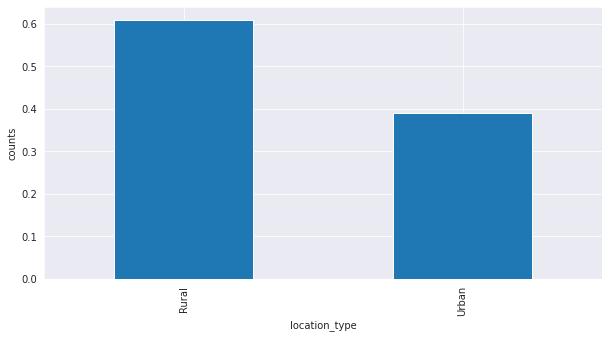

In [ ]:
print(train['location_type'].value_counts())
plt.figure(figsize=(10,5))
train['location_type'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('location_type')
print('+-+-'*28)

Yes    17454
No      6070
Name: cellphone_access, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


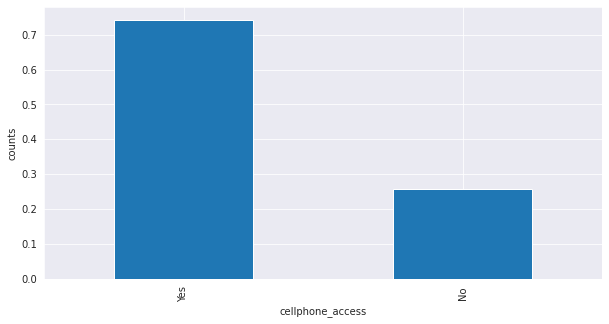

In [ ]:
print(train['cellphone_access'].value_counts())
plt.figure(figsize=(10,5))
train['cellphone_access'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('cellphone_access')
print('+-+-'*28)

Female    13877
Male       9647
Name: gender_of_respondent, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


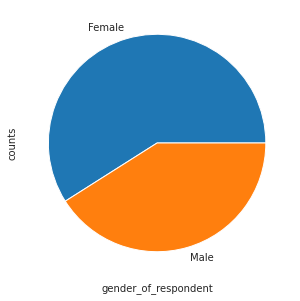

In [ ]:
print(train['gender_of_respondent'].value_counts())
plt.figure(figsize=(10,5))
train['gender_of_respondent'].value_counts(normalize=True).plot(kind='pie')
plt.ylabel('counts')
plt.xlabel('gender_of_respondent')
print('+-+-'*28)

Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: relationship_with_head, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


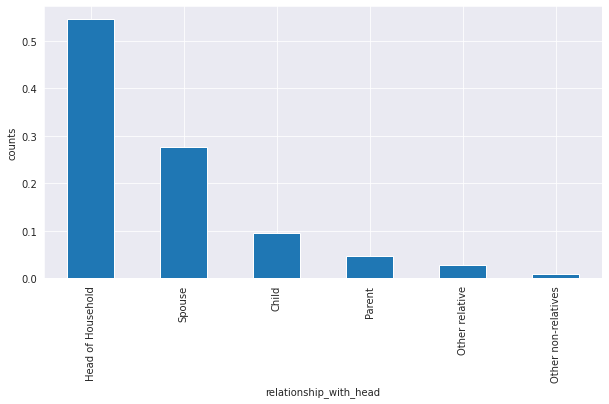

In [ ]:
print(train['relationship_with_head'].value_counts())
plt.figure(figsize=(10,5))
train['relationship_with_head'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('relationship_with_head')
print('+-+-'*28)

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


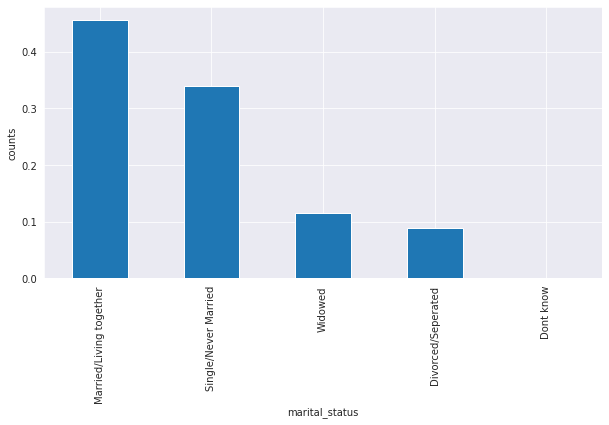

In [ ]:
print(train['marital_status'].value_counts())
plt.figure(figsize=(10,5))
train['marital_status'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('marital_status')
print('+-+-'*28)

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


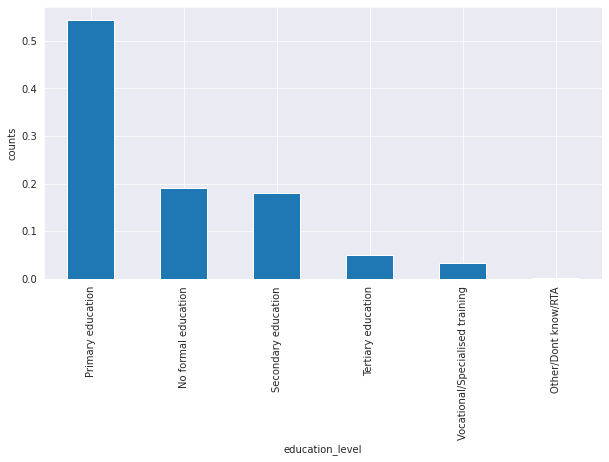

In [ ]:
print(train['education_level'].value_counts())
plt.figure(figsize=(10,5))
train['education_level'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('education_level')
print('+-+-'*28)

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-


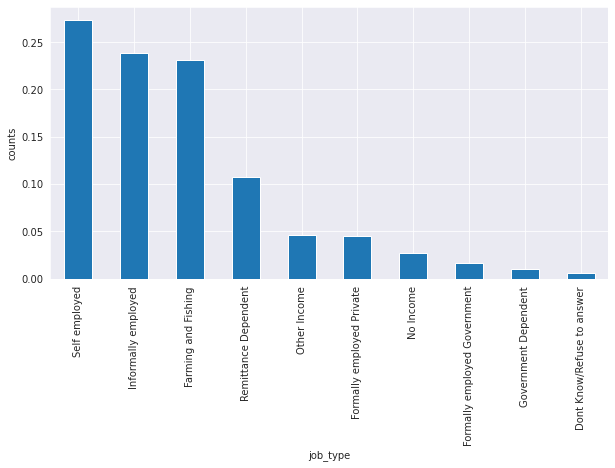

In [ ]:
print(train['job_type'].value_counts())
plt.figure(figsize=(10,5))
train['job_type'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('job_type')
print('+-+-'*28) 

In [ ]:
#Check summary of numerical fields
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


## Bivariate Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


bank_account    No   Yes
country                 
Kenya         4547  1521
Rwanda        7732  1003
Tanzania      6013   607
Uganda        1920   181
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


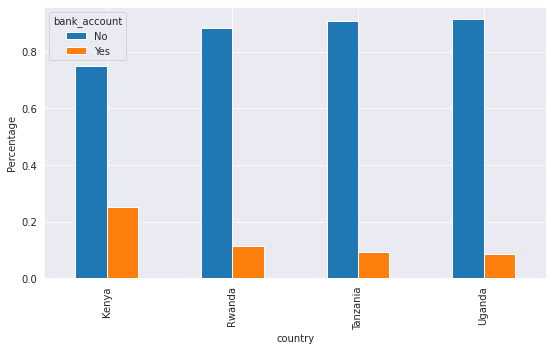

In [ ]:
print(pd.crosstab(train['country'],train['bank_account']))
country = pd.crosstab(train['country'],train['bank_account'])
country.div(country.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('country')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account    No   Yes
year                    
2016          7732  1003
2017          6013   607
2018          6467  1702
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


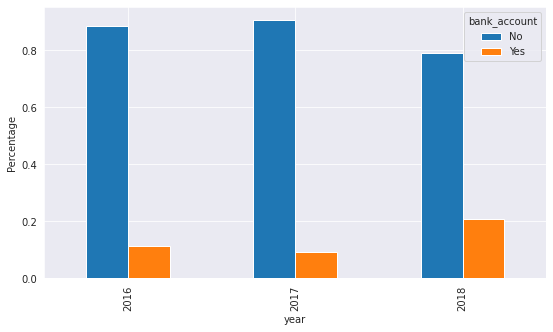

In [ ]:
print(pd.crosstab(train['year'],train['bank_account']))
year = pd.crosstab(train['year'],train['bank_account'])
year.div(year.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('year')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account      No   Yes
location_type             
Rural          12672  1671
Urban           7540  1641
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


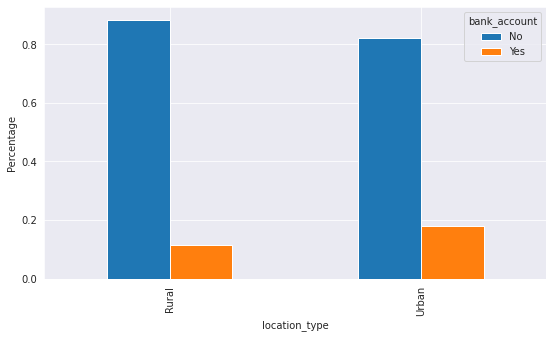

In [ ]:
print(pd.crosstab(train['location_type'],train['bank_account']))
location_type = pd.crosstab(train['location_type'],train['bank_account'])
location_type.div(location_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('location_type')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account         No   Yes
cellphone_access             
No                 5966   104
Yes               14246  3208
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


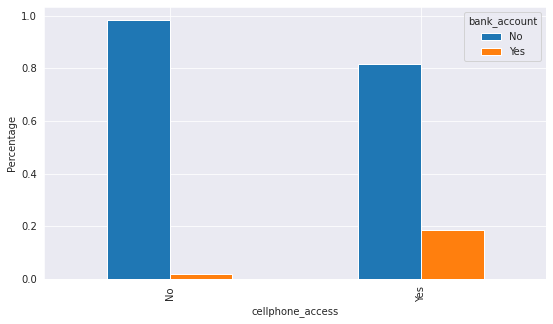

In [ ]:
print(pd.crosstab(train['cellphone_access'],train['bank_account']))
cellphone_access = pd.crosstab(train['cellphone_access'],train['bank_account'])
cellphone_access.div(cellphone_access.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(9,5))
plt.xlabel('cellphone_access')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account             No   Yes
gender_of_respondent             
Female                12395  1482
Male                   7817  1830
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


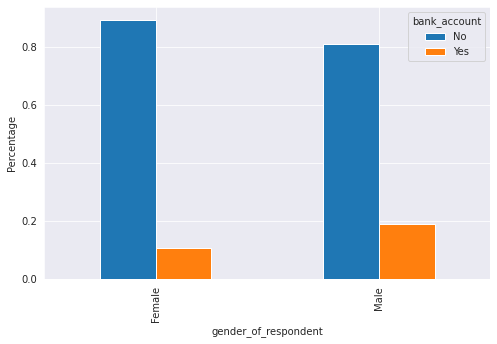

In [ ]:
print(pd.crosstab(train['gender_of_respondent'],train['bank_account']))
gender_of_respondent = pd.crosstab(train['gender_of_respondent'],train['bank_account'])
gender_of_respondent.div(gender_of_respondent.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,5))
plt.xlabel('gender_of_respondent')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account               No   Yes
relationship_with_head             
Child                    2036   193
Head of Household       10558  2273
Other non-relatives       170    20
Other relative            602    66
Parent                   1021    65
Spouse                   5825   695
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


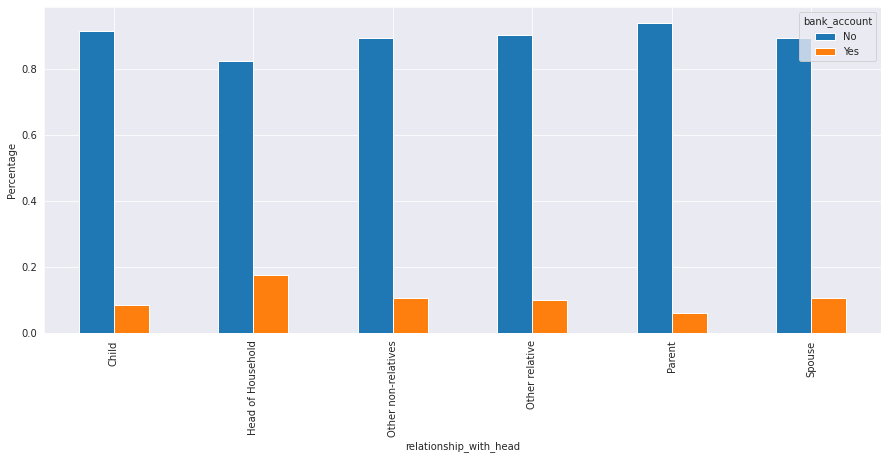

In [ ]:
print(pd.crosstab(train['relationship_with_head'],train['bank_account']))
relationship_with_head = pd.crosstab(train['relationship_with_head'],train['bank_account'])
relationship_with_head.div(relationship_with_head.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(15,6))
plt.xlabel('relationship_with_head')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account               No   Yes
marital_status                     
Divorced/Seperated       1842   234
Dont know                   6     2
Married/Living together  8883  1866
Single/Never Married     7017   966
Widowed                  2464   244
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


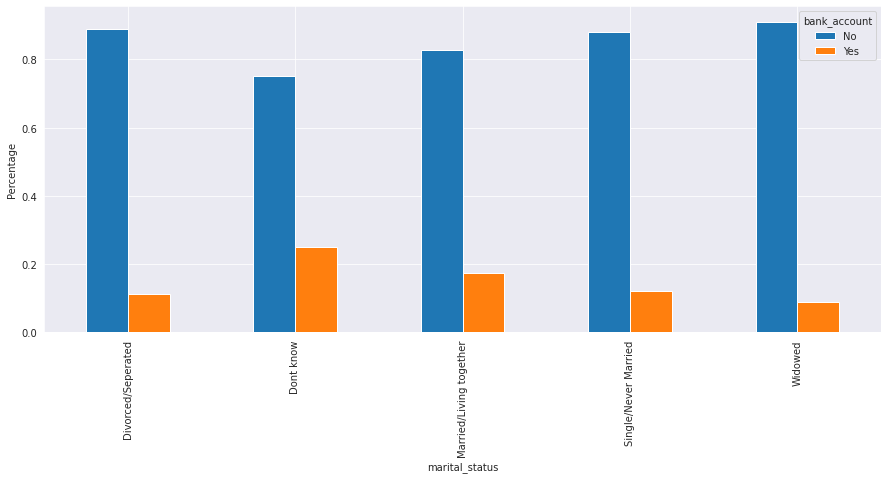

In [ ]:
print(pd.crosstab(train['marital_status'],train['bank_account']))
marital_status = pd.crosstab(train['marital_status'],train['bank_account'])
marital_status.div(marital_status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(15,6))
plt.xlabel('marital_status')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account                        No   Yes
education_level                             
No formal education               4339   176
Other/Dont know/RTA                 24    11
Primary education                11698  1093
Secondary education               3240   983
Tertiary education                 566   591
Vocational/Specialised training    345   458
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


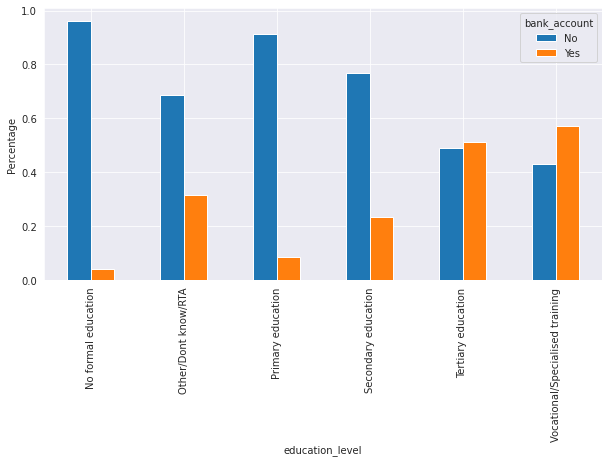

In [ ]:
print(pd.crosstab(train['education_level'],train['bank_account']))
education_level = pd.crosstab(train['education_level'],train['bank_account'])
education_level.div(education_level.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(10,5))
plt.xlabel('education_level')
p = plt.ylabel('Percentage')
print('+++'*35)

bank_account                    No  Yes
job_type                               
Dont Know/Refuse to answer     112   14
Farming and Fishing           4806  635
Formally employed Government    87  300
Formally employed Private      484  571
Government Dependent           197   50
Informally employed           5152  445
No Income                      614   13
Other Income                   884  196
Remittance Dependent          2287  240
Self employed                 5589  848
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


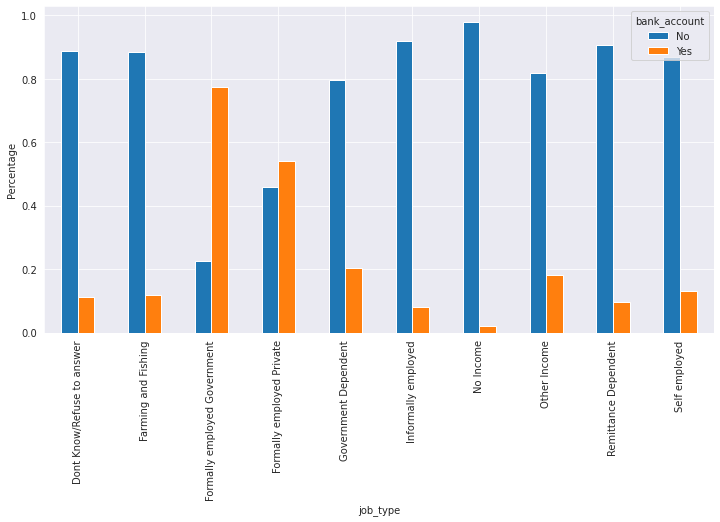

In [ ]:
print(pd.crosstab(train['job_type'],train['bank_account']))
job_type = pd.crosstab(train['job_type'],train['bank_account'])
job_type.div(job_type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(12,6))
plt.xlabel('job_type')
p = plt.ylabel('Percentage')
print('+++'*35)

## Dealing with missing values

In [ ]:
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

There are no missing values

## Machine Learning

In [ ]:
# Balance the predictor variable using SMOTE

In [ ]:
# Splitting the cleaned train data into train and validate
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_recall_curve, auc, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Convert the following numerical labels from integer to float
train[['household_size', 'age_of_respondent']] = train[['household_size', 'age_of_respondent']].values.astype(float)
test[['household_size', 'age_of_respondent']] = test[['household_size', 'age_of_respondent']].values.astype(float)

In [ ]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
dropcols = ['bank_account', 'year', 'uniqueid']
y = train['bank_account']
X= train.drop(columns=dropcols, axis=1)
test = test.drop(columns=['uniqueid', 'year'], axis=1) #you will use this for for predicting and submitting the resulting
print(X.shape)
print(y.shape)
print(test.shape)

(23524, 10)
(23524,)
(10086, 10)


In [ ]:
#get the categorical columns
cat_features_for_train = X.select_dtypes(include=['object']).columns.to_list()
cat_features_for_test = test.select_dtypes(include=['object']).columns.to_list()

In [ ]:
cat_features_for_train

['country',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [ ]:
cat_features_for_test

['country',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [ ]:
# One Hot Encoding conversion
X = pd.get_dummies(X, prefix_sep='_', columns = cat_features_for_train)
test = pd.get_dummies(test, prefix_sep='_', columns = cat_features_for_test)

In [ ]:
X.head()

,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,24.0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X.shape

(23524, 39)

In [ ]:
test.head()

,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_type_Rural,location_type_Urban,cellphone_access_No,cellphone_access_Yes,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,30.0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,7.0,51.0,1,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3.0,77.0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,6.0,39.0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3.0,16.0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
test.shape

(10086, 39)

### Encode the categorical features to numerical

In [ ]:
le = LabelEncoder()
# apply le on categorical feature columns
y = le.fit_transform(y)
# test[cat_features_for_test] = test[cat_features_for_test].apply(lambda col: le.fit_transform(col))
y

array([1, 0, 1, ..., 0, 0, 0])

### Split data into train and test

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)
print(X_train.shape)
print(y_train.shape)
print('+-'*7)
print(X_test.shape)
print(y_test.shape)

(17643, 39)
(17643,)
+-+-+-+-+-+-+-
(5881, 39)
(5881,)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# test = scaler.transform(test)

## RandomForestClassifier Model

The accuracy score for the random forest classifier is 87.93 with an roc_score of 0.60
Time taken to execute algorithm is :  1.72 s
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-



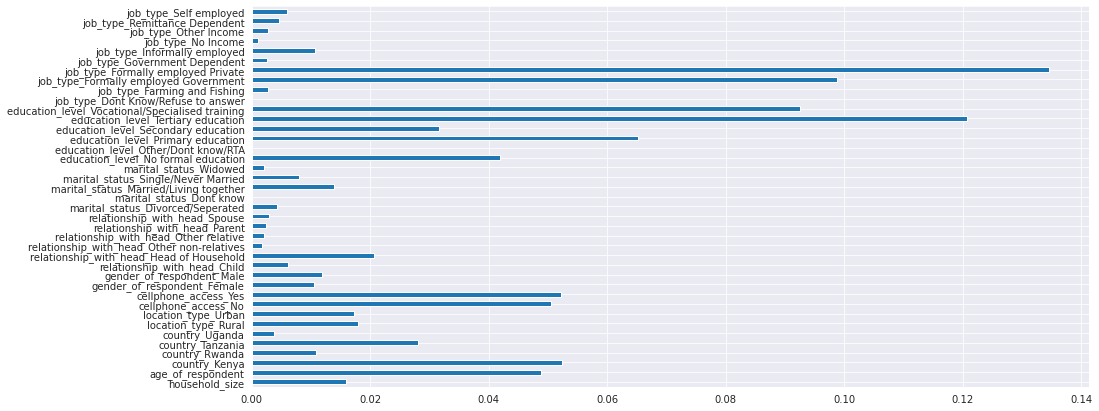

In [ ]:
rand = RandomForestClassifier(bootstrap=True,criterion = "gini",
                              n_jobs=-1,
                              max_depth=7,
                              n_estimators=600,
                              random_state=1,
                             verbose=False)
before = time.time()
randmodel = rand.fit(X_train,y_train)
randpred = randmodel.predict(X_test)
after = time.time()
# rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve

rfAccuracy = accuracy_score(y_test,randpred)
roc_score = roc_auc_score(y_test,randpred)
# print(rfAccuracy)

print("The accuracy score for the random forest classifier is %.2f with an roc_score of %.2f" % (rfAccuracy*100,roc_score))
after = time.time()
print("Time taken to execute algorithm is : {:5.2f} s".format(after - before))
print('+-'*50)
print('')
plt.figure(figsize=(15,7))
plots = pd.Series(randmodel.feature_importances_,index=X.columns)
plots.plot(kind="barh")
plt.show()

# Note

In [ ]:
# Don't be deceived by the accuracy of this model for the predictor class is very imbalanced.

AUC: 0.848


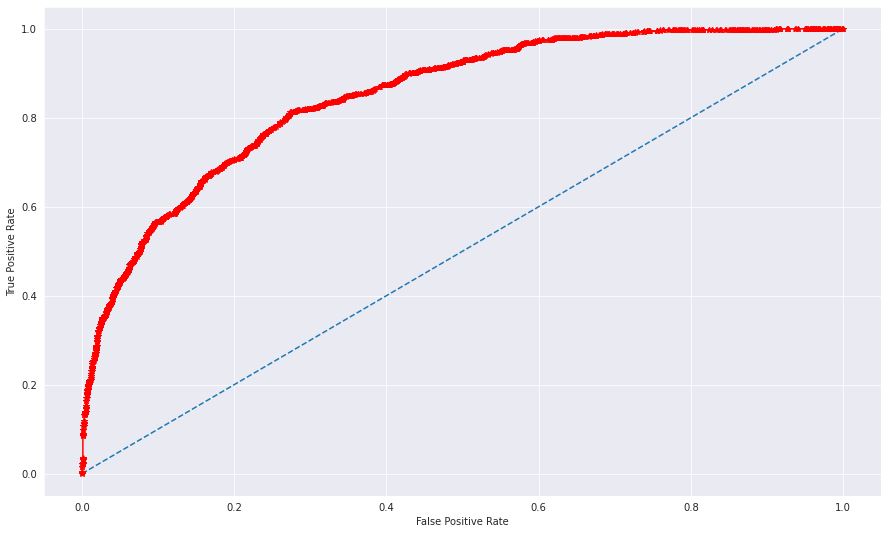

In [ ]:
# predict probabilities
probs = randmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.figure(figsize=(15,9))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='*', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [ ]:
#The more the red curvee approaches 1 on top left, the better the model

In [ ]:
confusion_matrix(y_test, randpred)

array([[4996,   56],
       [ 654,  175]])

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, randpred)

0.21109770808202655

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, randpred)

0.33018867924528306

In [ ]:
#import XGBClassifier
from xgboost import XGBClassifier

xgbmodel = XGBClassifier()
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model paramaters 
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgbmodel = GridSearchCV(xgbmodel, param_grid)
xgbmodel.fit(X_train, y_train)
print(xgbmodel.best_params_)

{'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 1.0}


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit and Evaluate model
xgbmodel = XGBClassifier(min_child_weight = 10, gamma = 2, subsample = 1.0, colsample_bytree = 0.8, max_depth = 5)
xgbmodel.fit(X_train, y_train)
y_pred = xgbmodel.predict(X_test)


# Get confusion matrix
confusion_matrix(y_test, y_pred)

array([[4911,  141],
       [ 545,  284]])

AUC: 0.861


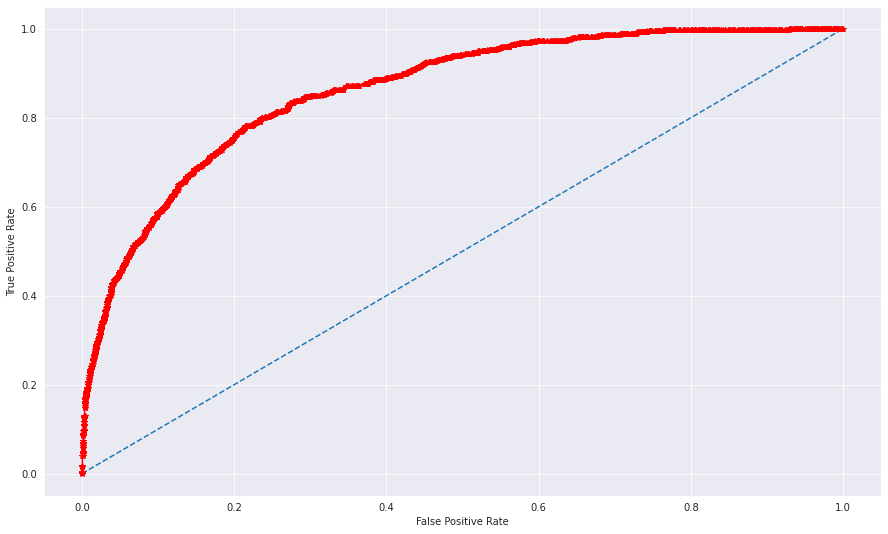

In [ ]:
# predict probabilities
probs = xgbmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.figure(figsize=(15,9))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='*', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

# Create submission file

In [ ]:
submission.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


In [ ]:
# create submission DataFrame
# since the xgbmodel has a higher AUC than the randmodel, we will use the 
# xgbmodel to make prediction on the test dataset for submission.
test_data = pd.read_csv('Test_v2.csv')

submission_df = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": xgbmodel.predict(test)})


In [ ]:
submission_df.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [ ]:
# Create submission csv file
submission_df.to_csv('SubFile.csv', index = False)

In [ ]:
#Upload the SubFile.csv to Zindi to obtain your score

In [ ]:
#Good Luck!!!!